In [1]:
# -*- coding: gbk -*

In [2]:
from torch.autograd import Variable
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import random

In [3]:
data = pd.read_csv(open('data.csv'))
data_nan = pd.read_csv(open('data.csv'))
data_nan = data_nan.replace(0,np.nan)
data = data.fillna(0)
print(data)
print(data.head(0))
sum_all = data.sum()
all_count = data_nan.count()
print(all_count)
#print(sum_all)
#print(sum_all['主要客流时间'])

      商户ID 一级行业  二级行业 商户类型          商户简称                        商户全称    省  \
0   902057   美食  小吃快餐   连锁       太门平直街分店         杭州新丰小吃有限公司(太平门直街分店)  浙江省   
1   914635   美食  小吃快餐   连锁      新丰小吃凤起路店            杭州新丰小吃有限公司(凤起路店)  浙江省   
2   900880   美食  小吃快餐   连锁     新丰小吃解放路分店             杭州新丰小吃有限公司解放路分店  浙江省   
3   917555   美食  小吃快餐   连锁      新丰小吃东新路店            杭州新丰小吃有限公司（东新路店）  浙江省   
4   902294   美食  小吃快餐   连锁      新丰小吃江陵路店            杭州新丰小吃有限公司(江陵路店)  浙江省   
5   900780   美食  小吃快餐   连锁         河坊街店1            杭州新丰小吃有限公司河坊街分店1  浙江省   
6   902071   美食  小吃快餐   连锁        中山路分店1          杭州新丰小吃有限公司(中山路分店1)  浙江省   
7   114205   美食  小吃快餐   连锁      新丰小吃江晖路店              杭州新丰小吃有限公司江晖路店  浙江省   
8   900881   美食  小吃快餐   连锁     新丰小吃江城路分店             杭州新丰小吃有限公司江城路分店  浙江省   
9   914644   美食  小吃快餐   连锁      新丰小吃庆春路店           杭州新丰小吃有限公司(庆春路店)   浙江省   
10  916099   美食  小吃快餐   连锁     新丰小吃儿童医院店           杭州新丰小吃有限公司（儿童医院店）  浙江省   
11  114016   美食  小吃快餐   连锁       新丰小吃义蓬店                     新丰小吃义蓬店  浙江省   

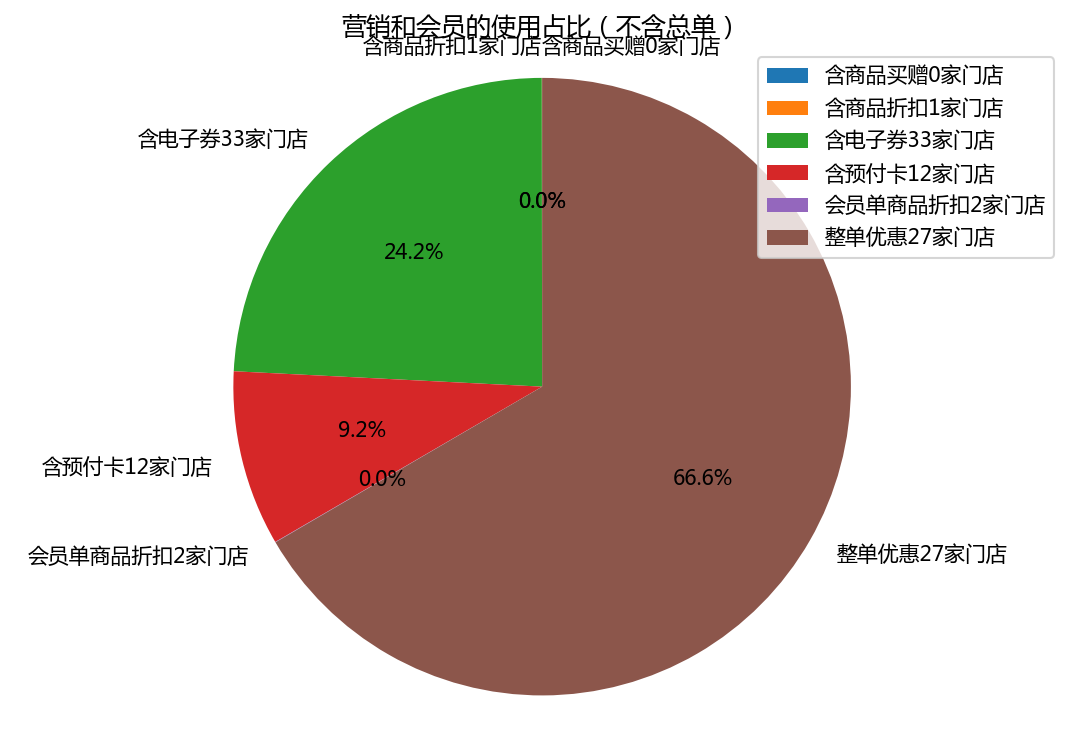

In [4]:

fig = plt.figure(figsize=(9,6),dpi=150)
labels = ['含商品买赠'+str(all_count['包含商品买赠订单数量'])+'家门店',
          '含商品折扣'+str(all_count['包含商品折扣订单数量'])+'家门店',
          '含电子券'+str(all_count['包含电子券订单数量'])+'家门店',
          '含预付卡'+str(all_count['预付卡支付订单数量'])+'家门店',
          '会员单商品折扣'+str(all_count['会员单商品折扣'])+'家门店',
          '整单优惠'+str(all_count['整单优惠'])+'家门店',
         ]
ax = fig.add_subplot(1,1,1)

sizes = [sum_all['包含商品买赠订单数量'],
         sum_all['包含商品折扣订单数量'],
         sum_all['包含电子券订单数量'],
         sum_all['预付卡支付订单数量'],
         sum_all['会员单商品折扣'],
         sum_all['整单优惠']]
patches,l_text,p_text = plt.pie(sizes,labels=labels,labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)

ax.set_title('营销和会员的使用占比（不含总单）')
for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.show()


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


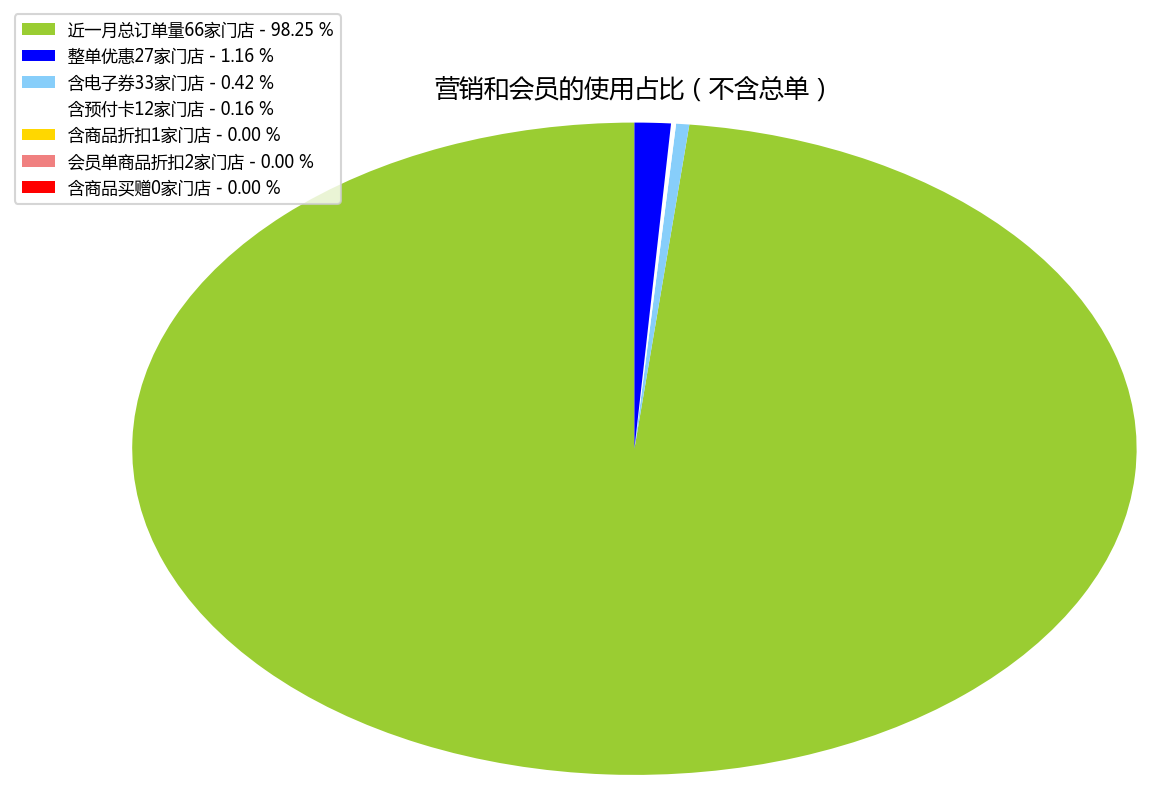

In [5]:
fig2 = plt.figure(figsize=(9,6),dpi=150)
x = ['近一月总订单量'+str(all_count['近一月订单量'])+'家门店',
          '含商品买赠'+str(all_count['包含商品买赠订单数量'])+'家门店',
          '含商品折扣'+str(all_count['包含商品折扣订单数量'])+'家门店',
          '含电子券'+str(all_count['包含电子券订单数量'])+'家门店',
          '含预付卡'+str(all_count['预付卡支付订单数量'])+'家门店',
          '会员单商品折扣'+str(all_count['会员单商品折扣'])+'家门店',
          '整单优惠'+str(all_count['整单优惠'])+'家门店',
         ]
y = np.array([sum_all['近一月订单量'],
         sum_all['包含商品买赠订单数量'],
         sum_all['包含商品折扣订单数量'],
         sum_all['包含电子券订单数量'],
         sum_all['预付卡支付订单数量'],
         sum_all['会员单商品折扣'],
         sum_all['整单优惠']])

colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
ax = fig2.add_subplot(1,1,1)
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
ax.set_title('营销和会员的使用占比（不含总单）')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


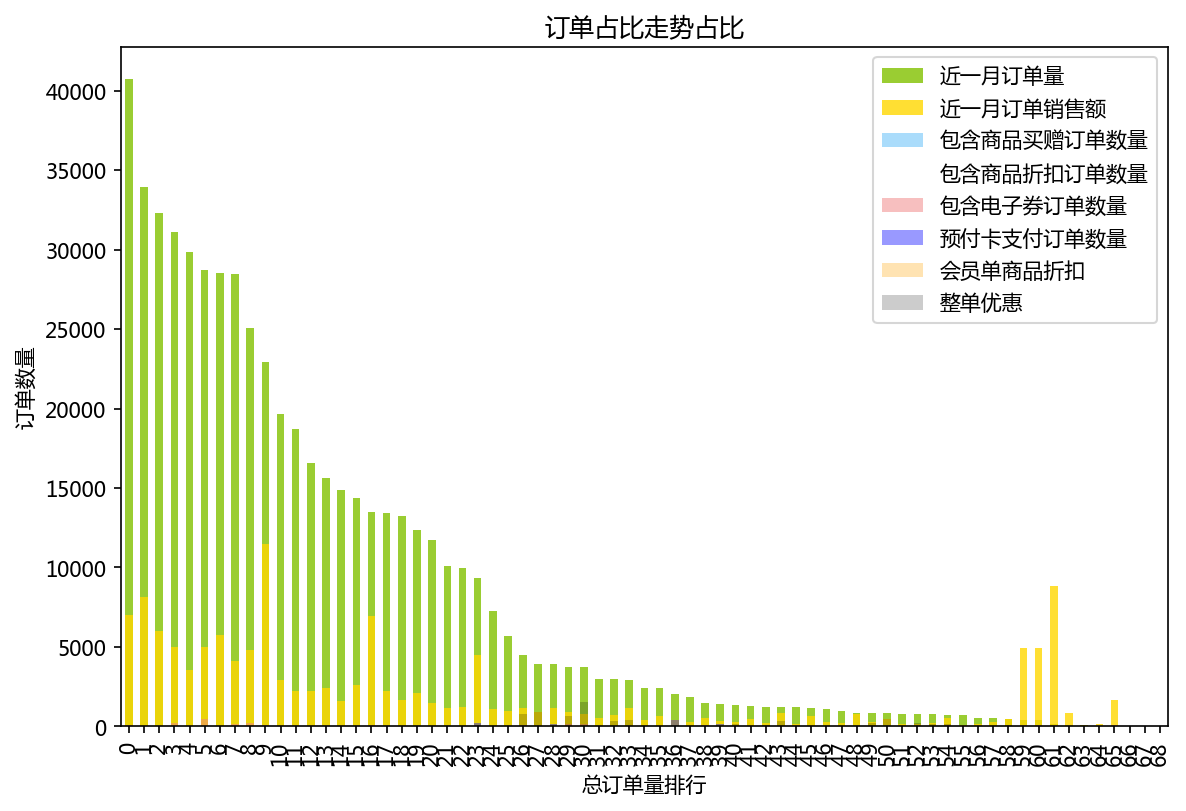

In [6]:
fig3 = plt.figure(figsize=(9,6),dpi=150)
a = data['近一月订单量']
b = (data['近一月订单销售额'])/100
c = data['包含商品买赠订单数量']
d = data['包含商品折扣订单数量']
e = data['包含电子券订单数量']
f = data['预付卡支付订单数量']
g = data['会员单商品折扣']
h = data['整单优惠']
num = np.arange(0,69)
a[num].T.plot.bar(color='yellowgreen',alpha=1,label='近一月订单量')
b[num].T.plot.bar(color='gold',alpha=0.8,label='近一月订单销售额')
c[num].T.plot.bar(color='lightskyblue',alpha=0.7,label='包含商品买赠订单数量')
d[num].T.plot.bar(color='white',alpha=0.6,label='包含商品折扣订单数量')
e[num].T.plot.bar(color='lightcoral',alpha=0.5,label='包含电子券订单数量')
f[num].T.plot.bar(color='blue',alpha=0.4,label='预付卡支付订单数量')
g[num].T.plot.bar(color='orange',alpha=0.3,label='会员单商品折扣')
h[num].T.plot.bar(color='black',alpha=0.2,label='整单优惠')

plt.xlabel('总订单量排行')
plt.ylabel('订单数量')

plt.title('订单占比走势占比')
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


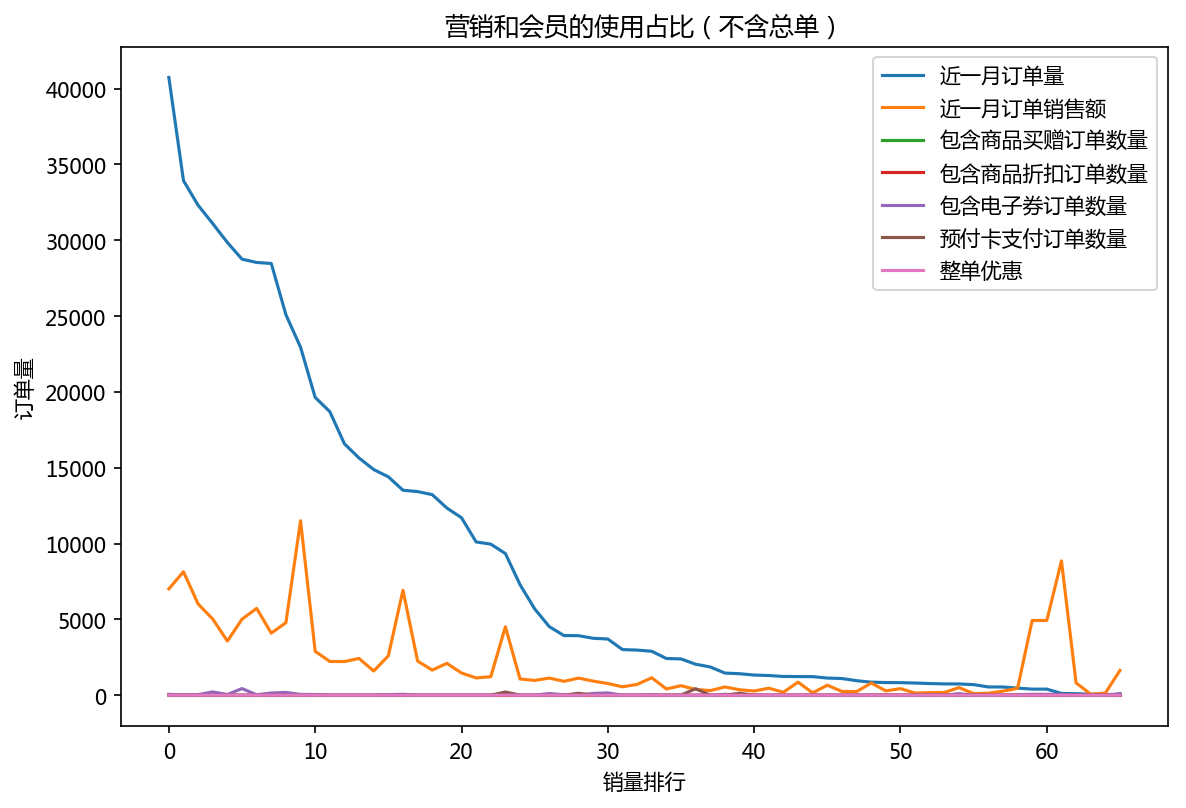

In [7]:
fig4 = plt.figure(figsize=(9,6),dpi=150)
a = data['近一月订单量']
b = (data['近一月订单销售额'])/100
c = data['包含商品买赠订单数量']
d = data['包含商品折扣订单数量']
e = data['包含电子券订单数量']
f = data['预付卡支付订单数量']
g = data['会员单商品折扣']
h = data['整单优惠']

x = np.arange(0,66)


plt.plot(x,a,'',label='近一月订单量')
plt.plot(x,b,'',label='近一月订单销售额')
plt.plot(x,c,'',label='包含商品买赠订单数量')
plt.plot(x,d,'',label='包含商品折扣订单数量')
plt.plot(x,e,'',label='包含电子券订单数量')
plt.plot(x,f,'',label='预付卡支付订单数量')
plt.plot(x,g,'',label='整单优惠')
plt.legend(loc='upper right')
#plt.plot(steps2, out.data.numpy().flatten(), 'b-')
ax = fig4.add_subplot(1,1,1)

ax.set_title('营销和会员的使用占比（不含总单）')
plt.xlabel('销量排行')
plt.ylabel('订单量')
plt.draw()
plt.ioff()
plt.show()   

In [8]:
data.loc[(data["会员人数"] == 0.0) & (data["预付卡支付订单数量"]==0.0), ["商户ID", "商户类型" , "商户简称", "近一月订单量"]].head()

,商户ID,商户类型,商户简称,近一月订单量
0,902057,连锁,太门平直街分店,40737
1,914635,连锁,新丰小吃凤起路店,33932
2,900880,连锁,新丰小吃解放路分店,32309
3,917555,连锁,新丰小吃东新路店,31099
4,902294,连锁,新丰小吃江陵路店,29857
